In [1]:
#****************************************************************************************************************************#
# Project             : Spam Mail Detection                                                                                  # 
# Methodology         : Perfrom Logictic Regression to build the model for detecting whether the mail data is spam or not    # 
# Model               : Logistic Regression from scratch and using scklearn library                                          # 
# Performance Metrics : Accuracy, AUC curve, Confusion Matrix, F1 score, specificity, sensitivity, TPR, FPR                  #                  
# Author              : Pavan Kumar Battula                                                                                  # 
#****************************************************************************************************************************#

## Importing the Required Libraries for perfoming Logistic Regression Analysis

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Loading the Given Dataset and view top 5 records to understand the data

In [3]:
data = pd.read_csv('C:/Users/PAVAN REDDY BATTULA/Desktop/UNH/Fall-2021/Intro to Data Science/Canvas/13 - Logistic Regression/DSCI6002_prj2_data.csv')

In [4]:
data.head()

,spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,0,2011-12-31 22:16:41,0,0,0,no,...,0,0,11.370,202,1,0,0,0,0,big
1,0,0,1,0,0,2011-12-31 23:03:59,0,0,0,no,...,0,0,10.504,202,1,0,0,0,1,small
2,0,0,1,0,0,2012-01-01 08:00:32,0,0,4,no,...,0,0,7.773,192,1,0,0,0,6,small
3,0,0,1,0,0,2012-01-01 01:09:49,0,0,0,no,...,0,0,13.256,255,1,0,0,0,48,small
4,0,0,1,0,0,2012-01-01 02:00:01,0,0,0,no,...,0,2,1.231,29,0,0,0,0,1,none


In [5]:
print("The total Number of records in the Given Data Set:", len(data))

The total Number of records in the Given Data Set: 3921


## Analysing Data

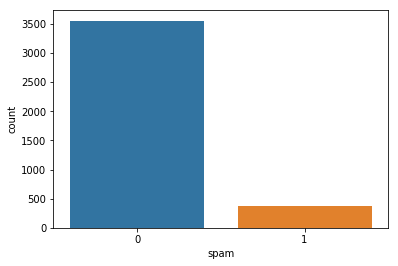

In [6]:
sns.countplot(x='spam', data = data)

### from the above graph, we can say that there is very less data for 1 and huge data for 0. Due to less data for 1, this may impact the model accuracy for predicting 1

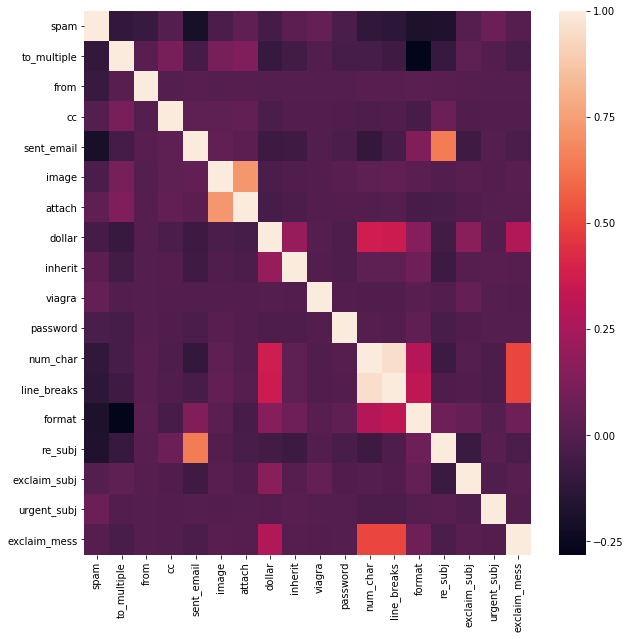

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr())

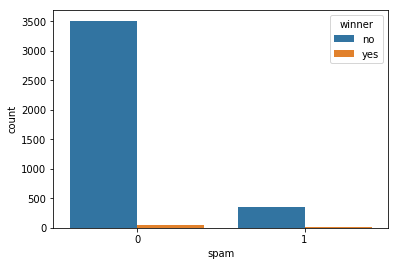

In [8]:
sns.countplot(x='spam', data = data, hue = 'winner')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 21 columns):
spam            3921 non-null int64
to_multiple     3921 non-null int64
from            3921 non-null int64
cc              3921 non-null int64
sent_email      3921 non-null int64
time            3921 non-null object
image           3921 non-null int64
attach          3921 non-null int64
dollar          3921 non-null int64
winner          3921 non-null object
inherit         3921 non-null int64
viagra          3921 non-null int64
password        3921 non-null int64
num_char        3921 non-null float64
line_breaks     3921 non-null int64
format          3921 non-null int64
re_subj         3921 non-null int64
exclaim_subj    3921 non-null int64
urgent_subj     3921 non-null int64
exclaim_mess    3921 non-null int64
number          3921 non-null object
dtypes: float64(1), int64(17), object(3)
memory usage: 643.4+ KB


In [10]:
data.isnull().sum()

spam            0
to_multiple     0
from            0
cc              0
sent_email      0
time            0
image           0
attach          0
dollar          0
winner          0
inherit         0
viagra          0
password        0
num_char        0
line_breaks     0
format          0
re_subj         0
exclaim_subj    0
urgent_subj     0
exclaim_mess    0
number          0
dtype: int64

### from the above data information we can say that there is no Null in the given data and not required any imputation

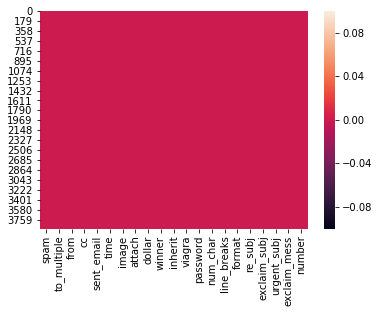

In [11]:
sns.heatmap(data.isnull())

## Analysing the correlation between spam & other variables

In [12]:
data.corr()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess
spam,1.000000,-0.110468,-0.086110,0.003137,-0.199397,-0.030658,0.038069,-0.047161,0.026327,0.049703,-0.030731,-0.115588,-0.126659,-0.184799,-0.175236,0.001664,0.069377,0.004603
to_multiple,-0.110468,1.000000,0.011992,0.112534,-0.047360,0.108477,0.132925,-0.091827,-0.053653,-0.006922,-0.043729,-0.045046,-0.068109,-0.280999,-0.095569,0.031352,-0.001769,-0.031496
from,-0.086110,0.011992,1.000000,0.004198,0.017170,0.002974,0.005118,0.000738,0.003926,0.000442,0.003118,0.016367,0.017247,0.021755,0.016462,0.008178,0.001170,0.003360
cc,0.003137,0.112534,0.004198,1.000000,0.034186,0.029952,0.039714,-0.030308,-0.002596,-0.002423,-0.015100,-0.019594,-0.011207,-0.036500,0.070187,-0.013871,-0.006416,-0.006578
sent_email,-0.199397,-0.047360,0.017170,0.034186,1.000000,0.039377,0.026281,-0.071110,-0.068900,-0.009911,-0.029577,-0.106958,-0.039985,0.136283,0.649146,-0.068206,0.000729,-0.027581
image,-0.030658,0.108477,0.002974,0.029952,0.039377,1.000000,0.728237,-0.026563,-0.013137,-0.001717,0.017362,0.032246,0.044207,0.020779,-0.002148,0.009858,-0.004546,0.010738
attach,0.038069,0.132925,0.005118,0.039714,0.026281,0.728237,1.000000,-0.045768,-0.020937,-0.002954,-0.002344,-0.007783,0.001149,-0.037184,-0.035706,-0.011565,0.000588,0.005535
dollar,-0.047161,-0.091827,0.000738,-0.030308,-0.071110,-0.026563,-0.045768,1.000000,0.200291,0.001695,-0.019584,0.374507,0.363271,0.153180,-0.053157,0.160094,-0.005138,0.282941
inherit,0.026327,-0.053653,0.003926,-0.002596,-0.068900,-0.013137,-0.020937,0.200291,1.000000,-0.002266,-0.015983,0.030012,0.030758,0.083586,-0.071398,0.007110,0.016555,0.008489
viagra,0.049703,-0.006922,0.000442,-0.002423,-0.009911,-0.001717,-0.002954,0.001695,-0.002266,1.000000,-0.001799,-0.011026,-0.011089,0.010575,-0.009502,0.054040,-0.000675,-0.000802


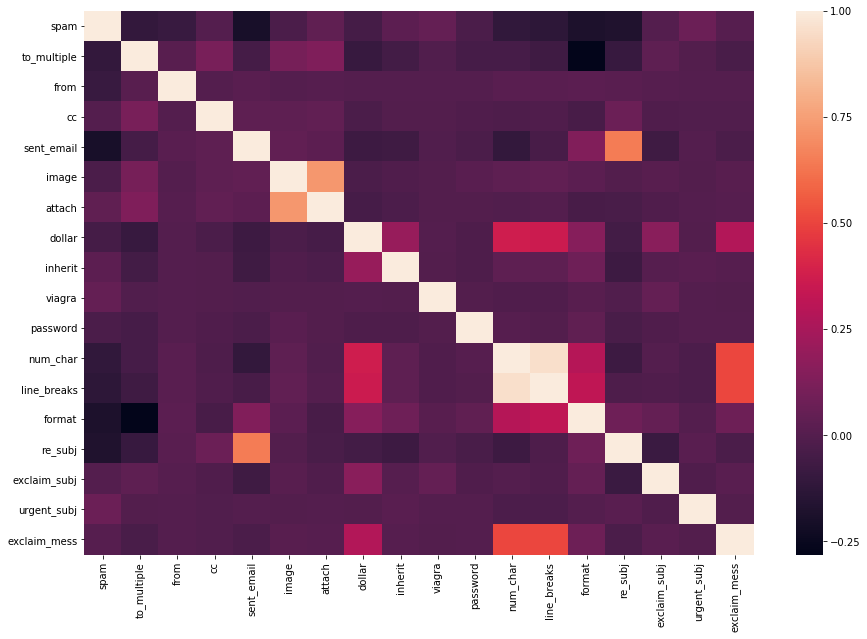

In [13]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr())
plt.show()

## Data Wrangling

In [14]:
data.drop('time',axis = 1, inplace = True)

In [15]:
number = pd.get_dummies(data['number'],drop_first= True)
winner = pd.get_dummies(data['winner'],drop_first= True)

In [16]:
data = pd.concat([data,number,winner],axis = 1)

In [17]:
data.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,...,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number,none,small,yes
0,0,0,1,0,0,0,0,0,no,0,...,202,1,0,0,0,0,big,0,0,0
1,0,0,1,0,0,0,0,0,no,0,...,202,1,0,0,0,1,small,0,1,0
2,0,0,1,0,0,0,0,4,no,1,...,192,1,0,0,0,6,small,0,1,0
3,0,0,1,0,0,0,0,0,no,0,...,255,1,0,0,0,48,small,0,1,0
4,0,0,1,0,0,0,0,0,no,0,...,29,0,0,0,0,1,none,1,0,0


In [18]:
data.drop(['number','winner','line_breaks','num_char'],axis = 1, inplace = True)

In [19]:
data.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,inherit,viagra,password,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,none,small,yes
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,0,0,0,4,1,0,0,1,0,0,0,6,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,48,0,1,0
4,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,1,1,0,0


## Train Data

In [20]:
np.random.seed(420)
Test = data.sample(1200)
Train = data[~data.isin(Test)]
Train.dropna(inplace = True)

## Activation Function

In [21]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

## Split Training Data

In [22]:
x_train = Train.drop('spam' , axis = 1)
y_train = Train['spam']
x_test = Test.drop('spam', axis = 1)
y_test = Test['spam']

## Coverting the Test & Train Data into Numpy Array for Building Model

In [23]:
x_train = np.array(x_train,dtype = 'int64')
x_test = np.array(x_test,dtype = 'int64')

y_train = np.array(y_train,dtype = 'int64')
y_test = np.array(y_test,dtype = 'int64')

In [24]:
print('The shape of the Xs Testing Data before re-shaping:',x_test.shape)
print('The shape of the Xs Training Data before re-shaping:',x_train.shape)

print('The shape of the Ys Testing Data before re-shaping:',y_test.shape)
print('The shape of the Ys Training Data before re-shaping:',y_train.shape)

The shape of the Xs Testing Data before re-shaping: (1200, 18)
The shape of the Xs Training Data before re-shaping: (2721, 18)
The shape of the Ys Testing Data before re-shaping: (1200,)
The shape of the Ys Training Data before re-shaping: (2721,)


## Reshaping the data

In [25]:
x_train = x_train.T
y_train = y_train.reshape(1,x_train.shape[1])

x_test = x_test.T
y_test = y_test.reshape(1,x_test.shape[1])

print('The shape of the Xs Testing Data after re-shaping:',x_test.shape)
print('The shape of the Xs Training Data after re-shaping:',x_train.shape)

print('The shape of the Ys Testing Data after re-shaping:',y_test.shape)
print('The shape of the Ys Training Data after re-shaping:',y_train.shape)

The shape of the Xs Testing Data after re-shaping: (18, 1200)
The shape of the Xs Training Data after re-shaping: (18, 2721)
The shape of the Ys Testing Data after re-shaping: (1, 1200)
The shape of the Ys Training Data after re-shaping: (1, 2721)


## Building Logistic Regression Model from Scratch

In [26]:
def logistic_regression(x,y,learning_rate,epochs):
    m = x.shape[1]
    n = x.shape[0]
    
    w = np.zeros((n,1))
    b = 0
    
    cost_list = []
    
    for i in range(epochs):
        Z = np.dot(w.T ,x) + b
        A = sigmoid(Z)
        
        #Cost Function
        cost = -(1/m)*np.sum( y*np.log(A) + (1-y)*np.log(1-A))
        
        #Gradient descent
        dw = (1/m) * np.dot(x,(A-y).T)
        db = (1/m) * np.sum(A-y)
        
        #Updating weights & bias
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        cost_list.append(cost)
        
        if (i%(epochs/10) ==0):
            print('Cost after',i,'Iteration is',cost)
    return w,b,cost_list

## Running the Model

In [27]:
w,b,cost_list = logistic_regression(x_train,y_train,0.005,20000)

Cost after 0 Iteration is 0.6931471805599454
Cost after 2000 Iteration is 0.27876013595398036
Cost after 4000 Iteration is 0.26876832497569836
Cost after 6000 Iteration is 0.2624245985454812
Cost after 8000 Iteration is 0.257795535461465
Cost after 10000 Iteration is 0.2542385888037998
Cost after 12000 Iteration is 0.2513974397404919
Cost after 14000 Iteration is 0.24906210297799436
Cost after 16000 Iteration is 0.24710087864400582
Cost after 18000 Iteration is 0.24542643780915332


## Cost function plotting

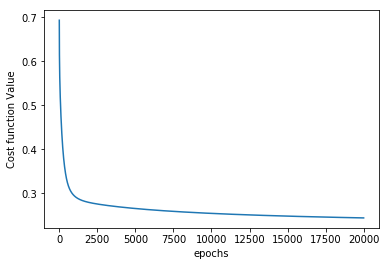

In [28]:
plt.plot(np.arange(20000),cost_list)
plt.xlabel('epochs')
plt.ylabel('Cost function Value')
plt.show()

### The above cost function plot shows that as the iteration increases the cost function decreases which means the Model is learning better and provide more accuarte results

## Testing Model Accuracy

In [29]:
def accuracy(x,y,w,b,thre):
    z = np.dot(w.T,x) + b
    a = sigmoid(z)
    c = a > thre
    a = np.array(c,dtype = 'int64')
    correct_prediction = y.shape[1]- np.sum(np.absolute(a - y))
    Accuracy = (correct_prediction/y.shape[1])*100
    print('correct prediction score:',correct_prediction)
    print('Accuracy of the Model:',Accuracy)  
    return a

In [30]:
a = accuracy(x_test,y_test,w,b,0.2)
print(a)

correct prediction score: 1095
Accuracy of the Model: 91.25
[[0 1 0 ... 0 0 0]]


## Sensitivity & Specificity

In [31]:
act_pos_pred_pos = 0
act_pos_pred_neg = 0
act_neg_pred_neg = 0
act_neg_pred_pos = 0

for i in range(y_test.shape[1]):
    if a[:,i] == y_test[:,i] & y_test[:,i] == 0:
        act_pos_pred_pos = act_pos_pred_pos + 1
    if a[:,i] != y_test[:,i] & y_test[:,i] == 0:
        act_pos_pred_neg = act_pos_pred_neg + 1
    if a[:,i] == y_test[:,i] & y_test[:,i] == 1:
        act_neg_pred_neg = act_neg_pred_neg + 1
    if a[:,i] != y_test[:,i] & y_test[:,i] == 1:
        act_neg_pred_pos = act_neg_pred_pos + 1

print('True Positive score :',act_pos_pred_pos)
print('False Negative score :',act_pos_pred_neg)
print('True Negative score :',act_neg_pred_neg)
print('False Positive score :',act_neg_pred_pos)

sensitivity = act_pos_pred_pos/(act_pos_pred_pos + act_pos_pred_neg)
specificity = act_neg_pred_neg/(act_neg_pred_neg + act_neg_pred_pos)

print('\nSensitivity :', sensitivity)
print('Specificity :', specificity)


True Positive score : 1043
False Negative score : 54
True Negative score : 52
False Positive score : 51

Sensitivity : 0.95077484047402
Specificity : 0.5048543689320388


## AUC & ROC Curve

In [32]:
Threshold = [0.1,0.2,0.3,0.4,0.5]
tpr = []
fpr = []
sen = []
spe = []

for j in Threshold:
    z = np.dot(w.T,x_test) + b
    a = sigmoid(z)
    c = a > j
    a = np.array(c,dtype = 'int64')

    act_pos_pred_pos = 0
    act_pos_pred_neg = 0
    act_neg_pred_neg = 0
    act_neg_pred_pos = 0
    sensitivity = specificity = 0
    for i in range(y_test.shape[1]):
        if a[:,i] == y_test[:,i] & y_test[:,i] == 0:
            act_pos_pred_pos = act_pos_pred_pos + 1
        if a[:,i] != y_test[:,i] & y_test[:,i] == 0:
            act_pos_pred_neg = act_pos_pred_neg + 1
        if a[:,i] == y_test[:,i] & y_test[:,i] == 1:
            act_neg_pred_neg = act_neg_pred_neg + 1
        if a[:,i] != y_test[:,i] & y_test[:,i] == 1:
            act_neg_pred_pos = act_neg_pred_pos + 1
      
    true_pos_rate = act_pos_pred_pos/(act_pos_pred_pos + act_pos_pred_neg)
    false_pos_rate = act_neg_pred_pos/(act_neg_pred_pos + act_neg_pred_neg)
    
    sensitivity = act_pos_pred_pos/(act_pos_pred_pos + act_pos_pred_neg)
    specificity = act_neg_pred_neg/(act_neg_pred_neg + act_neg_pred_pos)


    tpr.append(true_pos_rate)
    fpr.append(false_pos_rate)
    spe.append(specificity)
    sen.append(sensitivity)
    
print('The True Positive Rate for Given Threshold are:',tpr)
print('\nThe False Positive Rate  Given Threshold are:',fpr)

print('\nThe Sensitivity for Given Threshold are:',sen)
print('\nThe Specificity for  Given Threshold are:',spe)


The True Positive Rate for Given Threshold are: [0.8185961713764813, 0.95077484047402, 0.9735642661804923, 0.9945305378304466, 0.9963536918869644]

The False Positive Rate  Given Threshold are: [0.27184466019417475, 0.49514563106796117, 0.6796116504854369, 0.9029126213592233, 0.9611650485436893]

The Sensitivity for Given Threshold are: [0.8185961713764813, 0.95077484047402, 0.9735642661804923, 0.9945305378304466, 0.9963536918869644]

The Specificity for  Given Threshold are: [0.7281553398058253, 0.5048543689320388, 0.32038834951456313, 0.0970873786407767, 0.038834951456310676]


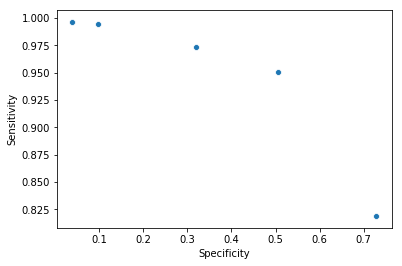

In [33]:
sns.scatterplot(x=spe,y=sen)
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.show()

AUC : 0.6527643794638511


Text(0,0.5,'True Positive Rate')

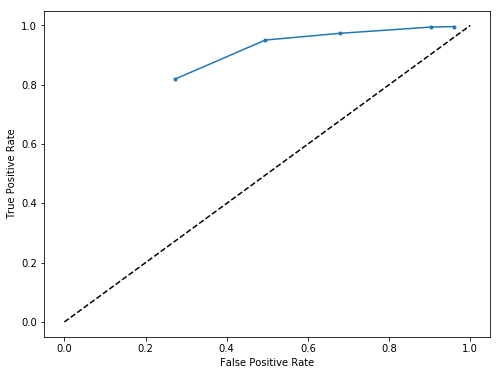

In [34]:
auc = np.trapz(tpr,fpr)
print('AUC :', auc)
plt.figure(figsize = (8,6))
plt.plot(fpr,tpr,'.-')
plt.plot([0,1],[0,1],'k--')
plt.plot([0],[1],'r',markersize = 15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


## Building Logistic Regression model using Sklearn Library 

In [36]:
data_set = data.drop('spam', axis  = 1)
data_target = data['spam']

In [37]:
from sklearn.model_selection import train_test_split
xl_train, xl_test, yl_train, yl_test = train_test_split(data_set, data_target,test_size=0.25, random_state=0)

In [38]:
## Import the Logistic regression model and creating an instance
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [39]:
## Training the model
logisticRegr.fit(xl_train, yl_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
## Predicting the test data by the model
predictions = logisticRegr.predict(xl_test)


In [41]:
## Accuracy of the model
score = logisticRegr.score(xl_test, yl_test)
print(score)

0.8878695208970439


## The model using SKlearn library has given the accuarcy of 88.7% which is close to the model without using sklearn which gave accuracy of 91.25%.